In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [11]:
data = fetch_olivetti_faces()
targets = data.target
images = data.images

(100, 4096)

In [4]:
print(images.shape)
print(targets.shape)
print(data.data.shape)

(400, 64, 64)
(400,)
(400, 4096)


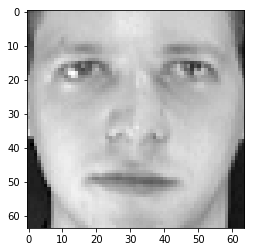

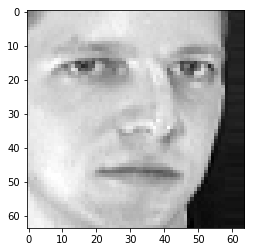

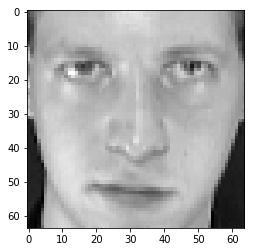

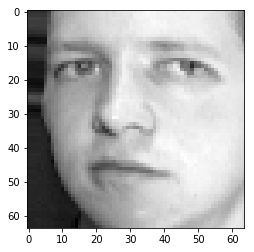

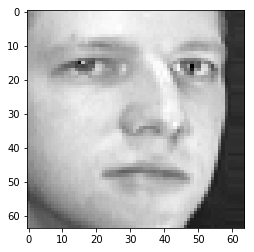

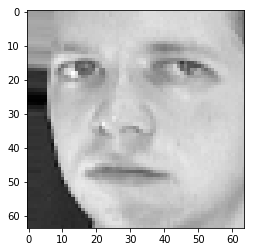

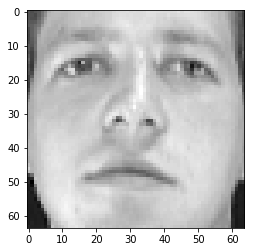

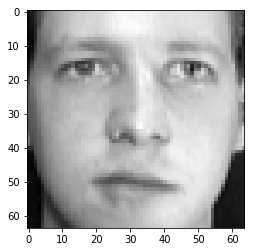

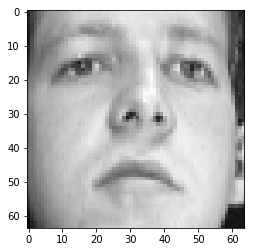

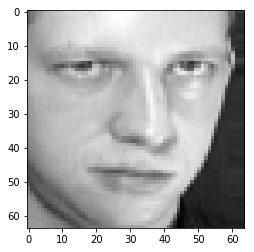

In [9]:
#dataset中有10个人，每人40张照片
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()

In [12]:
data = images.reshape((400,64*64))
train = data[targets<30]
test = data[targets>=30]

(100, 4096)

In [17]:
#test on a subset of people
n_faces = 5
rng = check_random_state(4)

"""
check_random_state 函数说明：
    将种子转换为np.random.RandomState实例
    如果seed为None，返回np.random使用的RandomState单例。
    如果seed是一个int，返回一个新的RandomState实例种子。
    如果seed已经是一个RandomState实例，则返回它。
    否则引发ValueError。
    提出修改建议
"""
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids,:]

In [18]:
n_pixels = data.shape[1]
#upper half of the faces
X_train = train[:,:(n_pixels+1)//2]
#lower half of the faces
y_train = train[:,n_pixels//2:]
X_test = test[:,:(n_pixels+1)//2]
y_test = test[:,n_pixels//2:]

In [19]:
#fit estimators
estimators = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,max_features=32,random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV()
}
y_test_predict = dict()
for name,estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

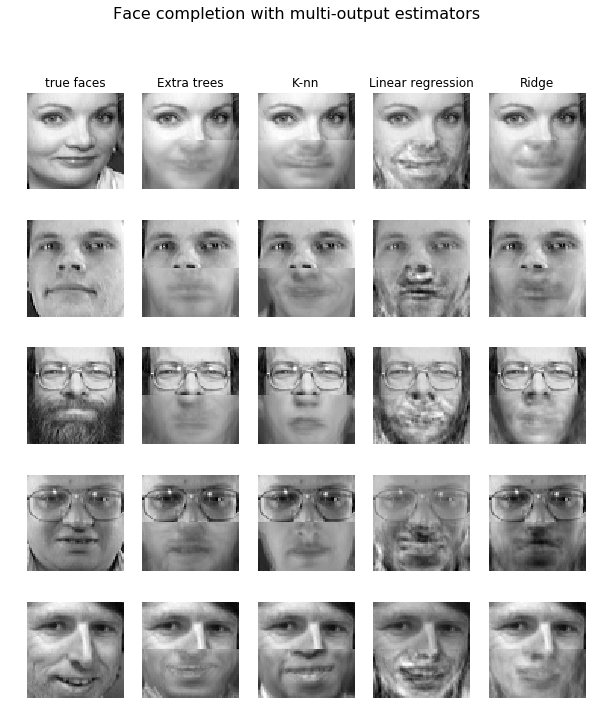

In [23]:
#plot the completed faces
image_shape = (64,64)
n_cols = 1+len(estimators)
plt.figure(figsize=(2.*n_cols,2.26*n_faces))
plt.suptitle("Face completion with multi-output estimators",size=16)

# true faces
for i in range(n_faces):
    true_face = np.hstack((X_test[i],y_test[i]))
    if i:
        sub = plt.subplot(n_faces,n_cols,i*n_cols+1)
    else:
        sub = plt.subplot(n_faces,n_cols,i*n_cols+1,title="true faces")
        
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
              cmap=plt.cm.gray,
              interpolation="nearest")
    
    """interpolation='nearest' simply displays an image without trying to 
    interpolate between pixels if the display resolution is not the same as 
    the image resolution (which is most often the case). 
    It will result an image in which pixels are displayed as a square of 
    multiple pixels."""
    
    #predicted faces
    for j,est in enumerate(sorted(estimators)):
        completed_face = np.hstack((X_test[i],y_test_predict[est][i]))
        
        if i:
            sub = plt.subplot(n_faces,n_cols,i*n_cols+2+j)
        else:
            sub = plt.subplot(n_faces,n_cols,i*n_cols+2+j,title=est)
            
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                  cmap=plt.cm.gray,
                  interpolation="nearest")
        
plt.show()

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

data = fetch_olivetti_faces()
targets = data.target
images = data.images
data = images.reshape((400,64*64))

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data, targets, test_size=0.3)

estimators = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,max_features=32,random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "GaussianNB": GaussianNB(),
    "Lasso": Lasso(),    
    "SVM": SVC()
}

# "Cross_val_predict": cross_val_predict(estimator,X)

y_test_predict = dict()
accuracy = dict()
for name,estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [44]:
print(y_test_predict)

{'Extra trees': array([16.2, 25.7, 12.5, 33. , 29.4, 25.9, 11.9, 22.7, 25.8, 17.9,  3.1,
       17.1, 27.1, 32.2, 29.1, 32.3, 19.7,  9.8, 27. , 14.5, 14.3, 13.2,
       15.4, 21.9, 19.5, 24. , 11.9,  7.2, 24.7, 12. , 22.4, 21.6, 23.2,
       23.2, 21.7, 26.1, 16. , 27.3, 25.5, 31.2, 12.3, 24.9, 14.4, 11. ,
       14. , 15.2, 12.3, 23.5, 15.4, 22.8, 21.9, 18.1, 12.5, 23.8, 21.4,
        7.3, 13.1, 34.9, 22. , 24.7, 33. , 21.1, 20.9, 21.4, 22.6, 15.3,
       29.3, 26.9, 12.4, 13.4, 15.9, 28.7,  9.4, 28.5, 27.5, 22.2,  6.9,
       26.5, 11. , 32.8, 15.4, 22.2, 21. , 12.1, 13.2, 17.7, 14.9, 15. ,
       11.8, 18.4, 27.1, 24.4, 29.6, 13.4,  8.3, 20.3, 22.8, 26.5,  3.5,
       32.4, 12. , 29.4, 10.8, 19.6, 12.6, 25.8, 14.3, 29.2, 21.1, 21.2,
       19.6, 24.8, 14.6, 13.3, 14.4, 30.5, 21. , 30.3, 25. , 14.7]), 'K-nn': array([16.6, 17.6,  1. , 38. , 27.6, 25.2, 16.4, 22.4, 28. , 14.6,  3.6,
       17.4, 24.4, 33.2, 32. , 33.8, 22.2, 12.2, 25.8, 14.8,  6. , 12.4,
       22. , 20. , 15.6, 23.4, 